# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

In [3]:
! git clone https://www.github.com/l-e13/the_bootstrap

fatal: destination path 'the_bootstrap' already exists and is not an empty directory.


**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

#Q1 Answers

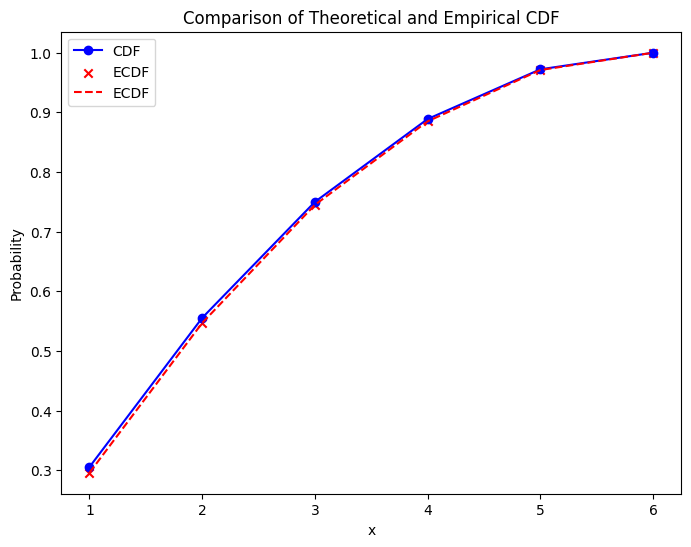

In [10]:
#1.
import numpy as np


faces = np.array([1,2,3,4,5,6])

# calculating cdf
pdf = np.zeros(6)
for i in range(6):
    for j in range(6):
        min_value = min(faces[i], faces[j])
        pdf[min_value - 1] += 1
pdf /= 36
cdf = np.cumsum(pdf)
# print(cdf)

#simulation
S = 1000
d1 = np.random.choice(faces, size= S)
d2 = np.random.choice(faces, size= S)
min_rolls = np.minimum(d1, d2)
ecdf = np.array([np.mean(min_rolls <= i) for i in faces])

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(faces, cdf, label='CDF', color='blue', linestyle='-', marker='o')
plt.scatter(faces, ecdf, label='ECDF', color='red', marker='x')
plt.plot(faces, ecdf, label='ECDF', color='red', linestyle='--')
plt.xlabel("x")
plt.ylabel("Probability")
plt.title('Comparison of Theoretical and Empirical CDF')
plt.legend()
plt.show()




expected value: 3.5038


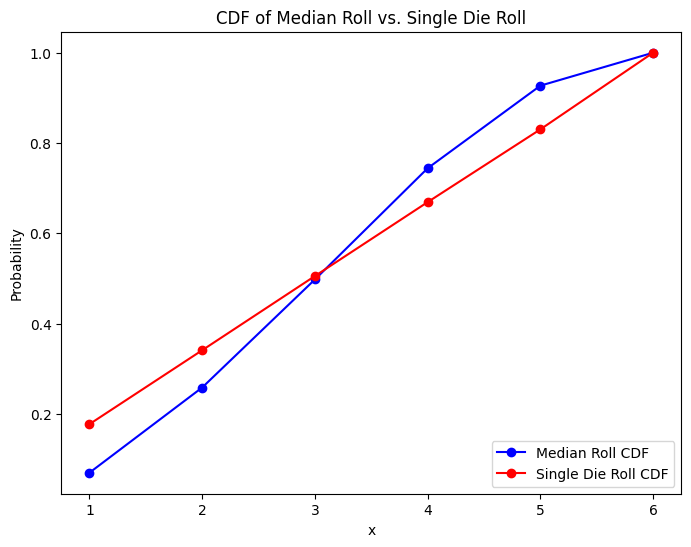

In [15]:
#2.
import numpy as np
import matplotlib.pyplot as plt

faces = np.array([1, 2, 3, 4, 5, 6])
S = 5000
d1 = np.random.choice(faces, size= S)
d2 = np.random.choice(faces, size= S)
d3 = np.random.choice(faces, size= S)
median_roll = np.median(np.array([d1, d2, d3]), axis=0)
expected_value = np.mean(median_roll)
print('expected value:', expected_value)

ecdf_med = np.array([np.mean(median_roll <= i) for i in faces])
ecdf_single = np.array([np.mean(d1 <= i) for i in faces])

plt.figure(figsize=(8, 6))
plt.plot(faces, ecdf_med, label='Median Roll CDF', color='blue', marker='o')
plt.plot(faces, ecdf_single, label='Single Die Roll CDF', color='red', marker='o')
plt.xlabel("x")
plt.ylabel("Probability")
plt.title("CDF of Median Roll vs. Single Die Roll")
plt.legend(loc='lower right')
plt.show()


              Total
count  50000.000000
mean       4.217540
std        3.269298
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       47.000000


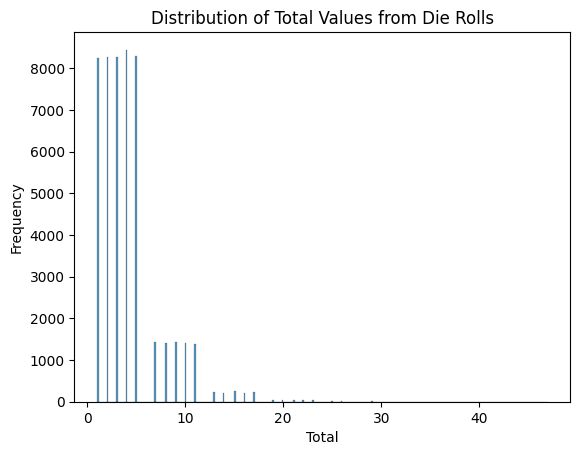

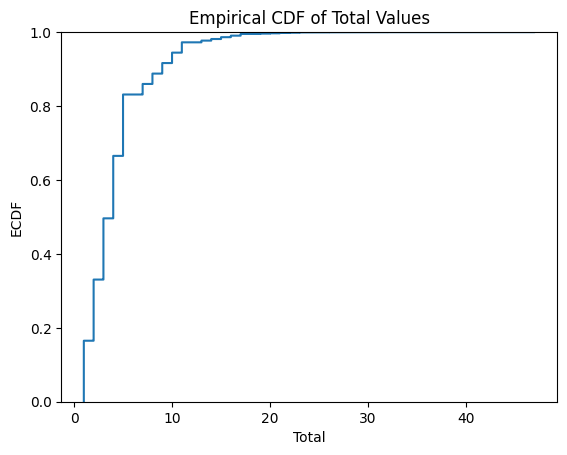

In [16]:
#3.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

faces = [1, 2, 3, 4, 5, 6]
S = 50000

results = []
for _ in range(S):
    total = 0
    while True:
        roll = np.random.choice(faces)
        total += roll
        if roll < 6:
            break # used ai for this line
    results.append(total)

results_df = pd.DataFrame(results, columns=["Total"])
print(results_df.describe())

sns.histplot(results_df['Total'])
plt.title("Distribution of Total Values from Die Rolls")
plt.xlabel("Total")
plt.ylabel("Frequency")
plt.show()

sns.ecdfplot(results_df['Total'])
plt.title("Empirical CDF of Total Values")
plt.xlabel("Total")
plt.ylabel("ECDF")
plt.show()


**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

## Q2 Answers

In [25]:
#1.
import pandas as pd

df = pd.read_csv('/content/the_bootstrap/data/mammogram.csv')

cross_tab = pd.crosstab(df['treatment'], df['breast_cancer_death'])
print("death:")
print(cross_tab)
print()

cross_tab_normalized = pd.crosstab(df['treatment'], df['breast_cancer_death'], margins=True, normalize='all')
print("death proportions:")
print(cross_tab_normalized)
print()

control_survival = cross_tab.loc['control', 'no'] / cross_tab.loc['control'].sum()
mammogram_survival = cross_tab.loc['mammogram', 'no'] / cross_tab.loc['mammogram'].sum()
raw_treatment_effect = mammogram_survival - control_survival
print("Control group survival rate: ", control_survival)
print("Mammogram group survival rate: ", mammogram_survival)
print("Raw treatment effect: ",raw_treatment_effect)



death:
breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500

death proportions:
breast_cancer_death        no       yes       All
treatment                                        
control              0.494295  0.005621  0.499917
mammogram            0.494518  0.005566  0.500083
All                  0.988813  0.011187  1.000000

Control group survival rate:  0.9887552883544868
Mammogram group survival rate:  0.9888703394546466
Raw treatment effect:  0.00011505110015985753


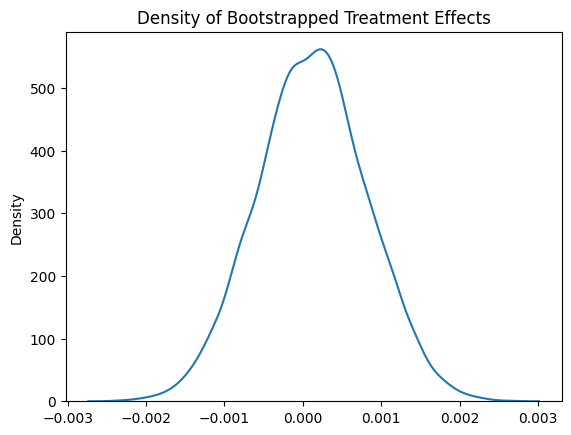

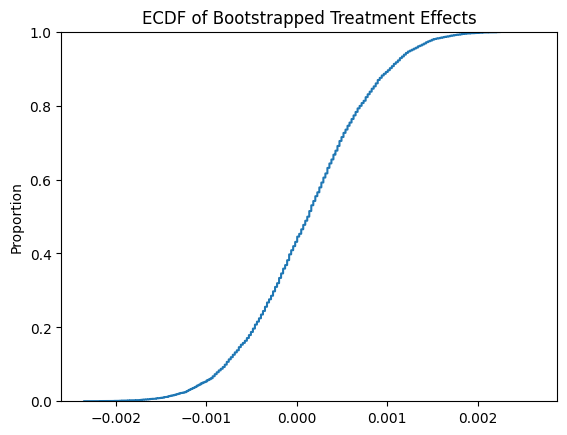

In [26]:
#2.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/the_bootstrap/data/mammogram.csv')
df['survive'] = (df['breast_cancer_death'] == 'no').astype(int)
df_treat = df[df['treatment'] == 'mammogram']
df_control = df[df['treatment'] == 'control']

S = 5000
treatment_effects = []

# used solutions to help with this part
for _ in range(S):
    df_treat_sample = df_treat.sample(df_treat.shape[0], replace=True)
    df_control_sample = df_control.sample(df_control.shape[0], replace=True)
    effect = df_treat_sample['survive'].mean() - df_control_sample['survive'].mean()
    treatment_effects.append(effect)


sns.kdeplot(treatment_effects)
plt.title('Density of Bootstrapped Treatment Effects')
plt.show()

sns.ecdfplot(treatment_effects)
plt.title('ECDF of Bootstrapped Treatment Effects')
plt.show()


In [29]:
# 3.
level = .99
lower_bound = np.quantile(treatment_effects, .005 )
upper_bound = np.quantile(treatment_effects, .995)
print('99% confidence interval: (', lower_bound, ',', upper_bound, ')' )

99% confidence interval: ( -0.001643843873984262 , 0.0018741902651528406 )


Yes, the 99% CI includes 0. This means the difference in survival rates between people who got a mammogram and didn't isn't statistically significant. Some things to consider when looking at our results are people with a family history of breast cancer, randomization of the participants, and other disease factors. According to our findings, mammograms might not be that helpful in reducing death, but they might be helpful for people with a family history of breast cancer. Since these people are at a higher risk, mammograms could be extra important for them. We should also think about the randomization of the mammogram group. If the people who got a mammogram chose to do it, you may be getting skewed results. Often, people who are already "healthy" tend to take more preventative measures so this may skew the data. Finally, there are many factors that play into breast cancer mortality. Some factors such as genes or lifestyle might not be taken into account.